## Titanic

### Question and problem definition
* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### Framework *AB6C*
1. Aquire data
2. Baseline
      - .info() .describe() .head()  
      - Missing data
      - Value counts
3. Correcting
4. Completing
5. Charting
    -  Numeric Data:  
        - Distributions 
        - Correlations
        - Pivot table  
    - Categorical Data:  
        - Bar charts  
        - Pivot table
6. Creating
7. Converting
8. Comparing

In [79]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

pd.options.mode.chained_assignment = None  # default='warn'

### 1. Aquire Data

In [46]:
# download
training = pd.read_csv('./train.csv')
test =  pd.read_csv('test.csv')

# seperate
training['train_test'] = 1
test['train_test'] = 0


### 2. Baseline

In [47]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


- Age and Cabin have quite a few no-values

In [48]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


- 38% of the sample survived
- The average age of the sample is 29

In [49]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


- Cabin is a mix of leter and numbers, with a pattern
- Ticket is also a mix of letters and numbers, but with a variety of formats
- Name have given names, family names and titles

In [50]:
# Missing data
print('Train columns with null values:\n', training.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
train_test       0
dtype: int64
----------


- In the train data, Cabin, Age and Embarked have null values
- In the test data, Cabin, Age and Fare.

In [51]:
# Value Counts
print(training['Cabin'].value_counts())

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58          

### 3. Correcting
Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs that we shoulf exclude from the dataset.

### 4. Completing

There are null values or missing data in the age, cabin, embarked field and fare (test data). 
Methodology:
- Quantitative data: Median
- Qualitative data: Mode

Therefore, Age will be imputed with the median by sex and class, Fare will be imputed by median, Embark will be imputed with mode and Cabin will be imputed as 'U' for unknown and dropped the numbers. 

In [52]:
#to clean both datasets at once:
data_cleaner = [training, test]

In [53]:
for dataset in data_cleaner:    
    #complete missing age with median by Sex and Pclass
    dataset['Age'] = dataset.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
    
    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    
    #replace null cabin values with U (unknown)
    dataset['Cabin'] = dataset['Cabin'].replace(np.nan, 'U')

    #remove numbers from cabin column
    dataset['Cabin'] = dataset['Cabin'].str.replace('\d+','', regex=True)

    dataset['Cabin'].loc[dataset['Cabin'].str.contains('B')] ='B'
    dataset['Cabin'].loc[dataset['Cabin'].str.contains('C')] ='C'
    dataset['Cabin'].loc[dataset['Cabin'].str.contains('D')] ='D'
    dataset['Cabin'].loc[dataset['Cabin'].str.contains('E')] ='E'
    dataset['Cabin'].loc[dataset['Cabin'].str.contains('F')] ='F'
    dataset['Cabin'].loc[dataset['Cabin'].str.contains('G')] ='G'

    
print(training['Cabin'].value_counts())    
print('\n')    
print(training.isnull().sum())
print("-"*10)
print(test.isnull().sum())

U    687
C     59
B     47
E     33
D     33
A     15
F     12
G      4
T      1
Name: Cabin, dtype: int64


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
train_test     0
dtype: int64
----------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
train_test     0
dtype: int64


### 5. Charting

First we separate the numerical data from the categorical data then do our exploratory analysis

In [54]:
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

##### Numeric

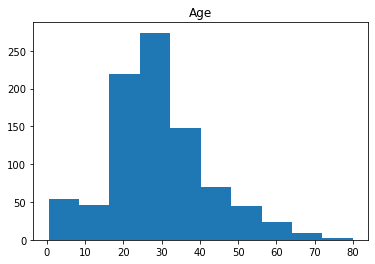

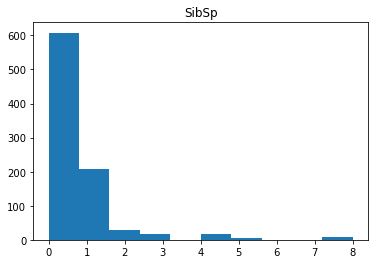

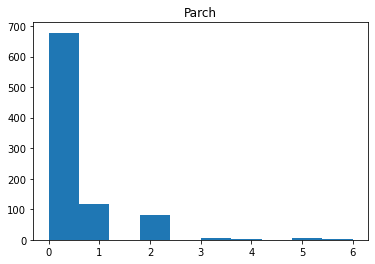

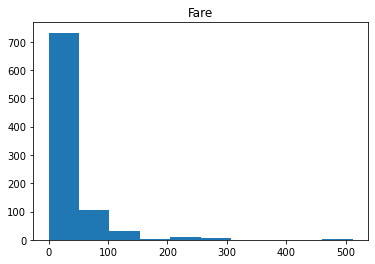

In [55]:
# Distributions
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

- Age is already farely normal distributed
- Fare we will probably have to be normalized

            Age     SibSp     Parch      Fare
Age    1.000000 -0.249854 -0.175526  0.122692
SibSp -0.249854  1.000000  0.414838  0.159651
Parch -0.175526  0.414838  1.000000  0.216225
Fare   0.122692  0.159651  0.216225  1.000000


<AxesSubplot:>

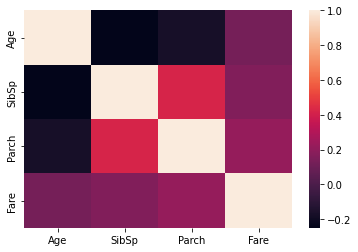

In [56]:
# Correlations
print(df_num.corr())
sns.heatmap(df_num.corr())

- The number of parents and the number of siblings have a high positive correlation, indicates that families usually traveled together
- Age and the number of children are very negative corrolated, which is intuitive. Same for Age and the number of parents.


We want to avoid multicollinearity when using regression, which happens when there are two variables that are too highly correlated and they have a overwhelming effect on the model. We can create a new feature called family size that take parents and sibilings as one variable.

In [57]:
# Pivot table
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,29.737705,22.117887,0.329690,0.553734
1,28.108684,48.395408,0.464912,0.473684


The higher chance of survival appers to be of those who:
- Are youger
- Paid more
- Have parents on board
- Don't have sibilings or spouses on board

##### Categorical

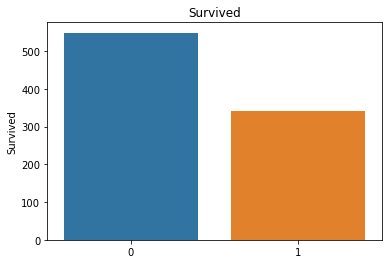

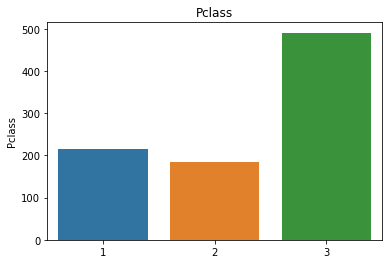

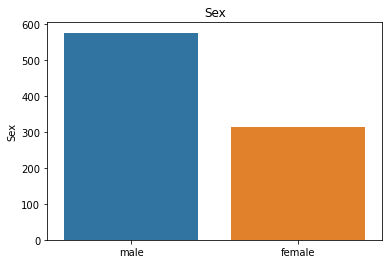

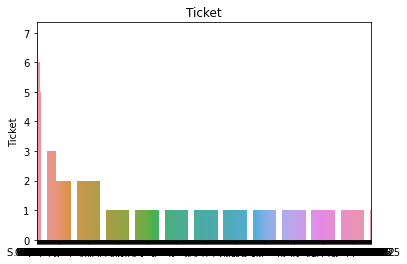

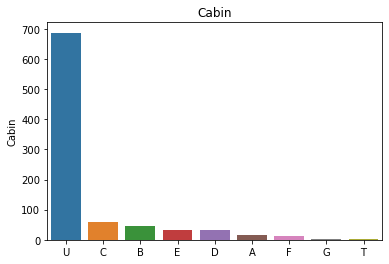

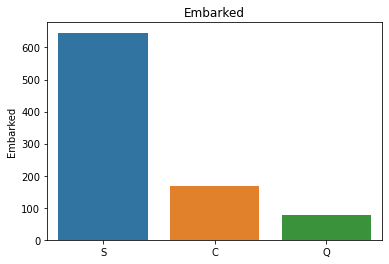

In [58]:
# Bar charts
for i in df_cat.columns:
    sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts()).set_title(i)
    plt.show()

- More people died than survived
- There were more passengers on the 3rd class than the other two combined 
- There were more men than women
- Most people embarked on the Southampton port

In [59]:
# Pivot table
table_pclass = pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count', margins=True)
table_plclass = round(table_pclass.div(table_pclass.iloc[-1,:], axis=1)*100,2)
print(table_plclass)
print('\n')

table_sex = pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count', margins=True)
table_sex = round(table_sex.div(table_sex.iloc[-1,:], axis=1)*100,2)
print(table_sex)
print('\n')

table_embarked = pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count', margins=True)
table_embarked = round(table_embarked.div(table_embarked.iloc[-1,:], axis=1)*100,2)
print(table_embarked)

Pclass         1       2       3     All
Survived                                
0          37.04   52.72   75.76   61.62
1          62.96   47.28   24.24   38.38
All       100.00  100.00  100.00  100.00


Sex       female    male     All
Survived                        
0           25.8   81.11   61.62
1           74.2   18.89   38.38
All        100.0  100.00  100.00


Embarked       C       Q      S     All
Survived                               
0          44.64   61.04   66.1   61.62
1          55.36   38.96   33.9   38.38
All       100.00  100.00  100.0  100.00


- First class people survived at a higher rate, specially when compared to the proporction of the 3rd class passengers
- 74% of women survived vs. only 19% of men
- Passengers that embarked through the French Cherbourg's port survived at a proportionately higher rate than the other two ports

### 6. Creating
Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will 
- evaluate if different ticket types impact survival rates
- create a title feature to determine if it played a role in survival.
- create family size feature


##### Ticket

In [60]:
#numeric vs non numeric 
for dataset in data_cleaner:   
    dataset['Numeric_ticket'] = dataset.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
    dataset['Letters_ticket'] = dataset.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').upper() if len(x.split(' ')[:-1]) >0 else 0)


training['Numeric_ticket'].value_counts()

1    661
0    230
Name: Numeric_ticket, dtype: int64

In [61]:
pd.set_option("max_rows", None)
training['Letters_ticket'].value_counts()

0            665
PC            60
CA            41
A5            21
STONO2        18
SOTONOQ       15
SCPARIS       11
WC            10
A4             7
SOC            6
FCC            5
C              5
SOPP           3
PP             3
WEP            3
PPP            2
SCAH           2
SOTONO2        2
SWPP           2
FC             1
SCAHBASLE      1
AS             1
SP             1
SC             1
SCOW           1
FA             1
SOP            1
SCA4           1
CASOTON        1
Name: Letters_ticket, dtype: int64

In [62]:
table_numeric_ticket = pd.pivot_table(training,index='Survived',columns='Numeric_ticket', values = 'Ticket', aggfunc='count', margins=True)
table_numeric_ticket = round(table_numeric_ticket.div(table_numeric_ticket.iloc[-1,:], axis=1)*100,2)
print(table_numeric_ticket)

Numeric_ticket       0       1     All
Survived                              
0                61.74   61.57   61.62
1                38.26   38.43   38.38
All             100.00  100.00  100.00


- It seems that these ratios are pretty similar so there isn't any value added by seperating the ticket category

##### Title

In [63]:
training.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [64]:
for dataset in data_cleaner:
    dataset['Title'] = dataset.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

pd.crosstab(training['Title'], training['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


- We can maintain Miss, Mrs, Mr and Master
- We can rename high ranking titles such as Dr, Military and Clergy as Noble
- We can replace other titles as Rare

In [66]:
for dataset in data_cleaner:   
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Noble')    
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Lady', 'Mme', 'the Countess', 'Dona', 'Ms'], 'Rare')  

print(training['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Noble      21
Rare        6
Name: Title, dtype: int64


##### Family size

In [67]:
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

### 7. Converting

In [71]:
# Continuous variable bins
for dataset in data_cleaner:    
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [70]:
# Categorical data encoding
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset.Sex_Code = dataset.Sex_Code.astype(str)
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset.Embarked_Code = dataset.Embarked_Code.astype(str)
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset.Title_Code = dataset.Title_Code.astype(str)
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset.AgeBin_Code = dataset.AgeBin_Code.astype(str)
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    dataset.FareBin_Code = dataset.FareBin_Code.astype(str)
    dataset['Cabin_Code'] = label.fit_transform(dataset['Cabin'])
    dataset.FareBin_Code = dataset.FareBin_Code.astype(str)

In [72]:
all_data = pd.concat([training, test])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype                   
---  ------          --------------  -----                   
 0   PassengerId     1309 non-null   int64                   
 1   Survived        891 non-null    float64                 
 2   Pclass          1309 non-null   int64                   
 3   Name            1309 non-null   object                  
 4   Sex             1309 non-null   object                  
 5   Age             1309 non-null   float64                 
 6   SibSp           1309 non-null   int64                   
 7   Parch           1309 non-null   int64                   
 8   Ticket          1309 non-null   object                  
 9   Fare            1309 non-null   float64                 
 10  Cabin           1309 non-null   object                  
 11  Embarked        1309 non-null   object                  
 12  train_test      1309 

In [74]:
all_dummies = all_data[['Pclass','FamilySize','IsAlone','Sex_Code','Embarked_Code','Title_Code','AgeBin_Code','FareBin_Code','Cabin_Code', 'train_test']]

In [75]:
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [80]:
X_train.head()

,Pclass,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code,Cabin_Code
0,3,2,0,1,2,2,1,0,8
1,1,2,0,0,0,3,2,3,2
2,3,1,1,0,2,1,1,1,8
3,1,2,0,0,2,3,2,3,2
4,3,1,1,1,2,2,2,1,8


### 8. Comparing

In [122]:
# Naive Bayes
gnb = GaussianNB()
cv_gnb = cross_val_score(gnb,X_train,y_train,cv=5)
cv_gnb_mean = round(cv_gnb.mean(),3)*100 
print(cv_gnb_mean)

76.7


In [121]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv_lr = cross_val_score(lr,X_train,y_train,cv=5)
cv_lr_mean = round(cv_lr.mean(),3)*100 
print(cv_lr_mean)

78.7


In [120]:
# Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt,X_train,y_train,cv=5)
cv_dt_mean = round(cv_dt.mean(),3)*100
print(cv_dt_mean)

81.10000000000001


In [119]:
# K Nearest Neighbor
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn,X_train,y_train,cv=5)
cv_knn_mean = round(cv_knn.mean(),3)*100
print(cv_knn_mean)

78.0


In [118]:
# Random Forest
rf = RandomForestClassifier(random_state = 1)
cv_rf = cross_val_score(rf,X_train,y_train,cv=5)
cv_rf_mean = round(cv_rf.mean(),3)*100
print(cv_rf_mean)

81.6


In [117]:
# Support Vector Classifier
svc = SVC(probability = True)
cv_svc = cross_val_score(svc,X_train,y_train,cv=5)
cv_svc_mean = round(cv_svc.mean(),3)*100
print(cv_svc_mean)

81.6


In [125]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 
              'K Nearest Neighbor', 'Random Forest', 'Support Vector Classifier'],
    'Score': [cv_gnb_mean, cv_lr_mean, cv_dt_mean, 
              cv_knn_mean, cv_rf_mean, cv_svc_mean]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,81.6
5,Support Vector Classifier,81.6
2,Decision Tree,81.1
1,Logistic Regression,78.7
3,K Nearest Neighbor,78.0
0,Naive Bayes,76.7


In [144]:
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test).astype(int)

In [145]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [147]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [148]:
submission.to_csv('submission.csv', index=False)